In [ ]:
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 7
**Entrena y perfecciona un árbol de decisión para el conjunto de datos moons siguiendo estos pasos:**

- Utiliza make_moons(n_samples=10000, noise=0.4) para generar un conjunto de datos moons.

- Usa train_test_split() para dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba.

- Utiliza una búsqueda exhaustiva con validación cruzada (con ayuda de la clase GridSearchCV) para encontrar buenos valores de hiperparámetros para un DecisionTreeClassifier. Pista: prueba varios valores para max_leaf_nodes.

- Entrénalo con el conjunto de entrenamiento completo usando estos hiperpará- metros y mide el rendimiento de tu modelo con el conjunto de prueba. Deberías conseguir una precisión de 85%-87% aproximadamente.



In [ ]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [ ]:
X

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10000, 2)
y shape: (10000,)


In [ ]:
from os.path import split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(8000, 2)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
export_graphviz(
    tree,
    out_file="moons_tree.dot",
    feature_names=["x1", "x2"],
    class_names=["0", "1"],
    rounded=True,
    filled=True
)

graph = Source.from_file("moons_tree.dot")
graph.render("moons_tree", format="pdf")

'moons_tree.pdf'

In [ ]:
rmse = -cross_val_score(tree, X_train, y_train, scoring="neg_root_mean_squared_error")
accuracy = cross_val_score(tree, X_train, y_train, scoring="accuracy")
print(f"Accuracy: {list(np.round(accuracy, 2))} Mean: {accuracy.mean():.4f}")
print(f"RMSE: {list(np.round(rmse, 2))} Mean: {rmse.mean():.4f}")

Accuracy: [0.78, 0.81, 0.81, 0.78, 0.81] Mean: 0.8000
RMSE: [0.47, 0.44, 0.43, 0.47, 0.44] Mean: 0.4490


In [ ]:
acc_pred = accuracy_score(y_test, tree.predict(X_test))
sqrt_pred = np.sqrt(mean_squared_error(y_test, tree.predict(X_test)))

print(f"Accuracy: {np.round(acc_pred, 4)}")
print(f"RMSE: {np.round(sqrt_pred, 4)}")

Accuracy: 0.8155
RMSE: 0.4295


### Buscar mejores hiperparámetros.

In [ ]:
grid_params = {
    "max_leaf_nodes": list(range(2, 30)),
    'max_depth': list(range(1, 7)),
}

grid_search = GridSearchCV(tree, grid_params, scoring="neg_root_mean_squared_error", verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END ......................max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=2; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=3; total time=   0.0s
[CV] END ......................max_depth=1, max_leaf_nodes=4; total time=   0.0s
[CV] END ......................max_depth=1, ma

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 6, 'max_leaf_nodes': 22}

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)
sorted_results.head(10)

,params,mean_test_score
160,"{'max_depth': 6, 'max_leaf_nodes': 22}",-0.378591
159,"{'max_depth': 6, 'max_leaf_nodes': 21}",-0.378749
161,"{'max_depth': 6, 'max_leaf_nodes': 23}",-0.379084
157,"{'max_depth': 6, 'max_leaf_nodes': 19}",-0.379090
158,"{'max_depth': 6, 'max_leaf_nodes': 20}",-0.379583
163,"{'max_depth': 6, 'max_leaf_nodes': 25}",-0.380442
162,"{'max_depth': 6, 'max_leaf_nodes': 24}",-0.380442
164,"{'max_depth': 6, 'max_leaf_nodes': 26}",-0.381243
156,"{'max_depth': 6, 'max_leaf_nodes': 18}",-0.381600
165,"{'max_depth': 6, 'max_leaf_nodes': 27}",-0.381722


In [ ]:
rmse = -cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring="neg_root_mean_squared_error")

In [ ]:
np.round(rmse.mean(), 4)

0.3786

In [ ]:
export_graphviz(
    grid_search.best_estimator_,
    out_file="moons_tree3.dot",
    feature_names=["x1", "x2"],
    class_names=["0", "1"],
    rounded=True,
    filled=True
)

graph = Source.from_file("moons_tree3.dot")
graph.render("moons_tree3", format="pdf")

'moons_tree3.pdf'

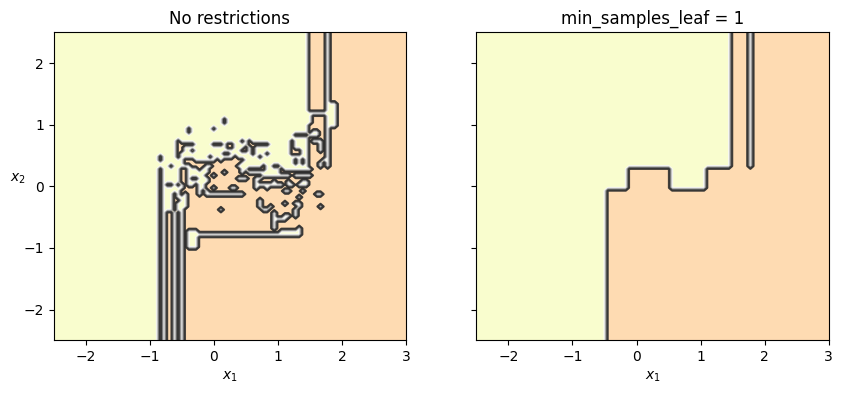

In [ ]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    """for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")"""
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree, X, y,
                       axes=[-2.5, 3, -2.5, 2.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(grid_search.best_estimator_, X, y,
                       axes=[-2.5,  3, -2.5, 2.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {grid_search.best_estimator_.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [ ]:
tree_regulated_acc = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
tree_regulated_rmse = np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

# print(f"Tree overfitted Accuracity {np.round(tree_overfitted_acc)}")
# print(f"Tree overfitted RMSE: {np.round(tree_overfitted_rmse.mean(), 4)}\n")

print(f"Tree regulated Accuracity: {np.round(tree_regulated_acc, 4)}")
print(f"Tree regulated RMSE: {np.round(tree_regulated_rmse.mean(), 4)}")

Tree overfitted Accuracity 1.0
Tree overfitted RMSE: 0.4295

Tree regulated Accuracity: 0.8595
Tree regulated RMSE: 0.3748


# Ejercicio 8
## Cultiva un bosque siguiendo estos pasos:

- Siguiendo con el ejercicio anterior, genera 1.000 subconjuntos del conjunto de entrenamiento, cada uno con 100 instancias elegidas aleatoriamente. Pista: puedes usar la clase ShuffleSplit de Scikit-Learn para esto.

- Entrena un árbol de decisión con cada subconjunto, utilizando los mejores valores de hiperparámetros hallados en el ejercicio anterior. Evalúa estos 1.000 árboles de decisión con el conjunto de prueba. Dado que se entrenaron con conjuntos más pequeños, es probable que estos árboles de decisión tengan peor rendimiento que el primero, consiguiendo solo un 80% de precisión, más o menos.

- Ahora viene lo bueno. Para cada instancia del conjunto de prueba, genera las predicciones de los mil árboles de decisión y conserva solo la predicción más frecuente (puedes usar la función mode() de SciPy para esto). Este enfoque te da predicciones del voto de la mayoría sobre el conjunto de prueba.

- Evalúa estas predicciones con el conjunto de prueba: deberías obtener una precisión ligeramente más alta que con el primer modelo (aproximadamente un 0,5-1,5% más alta). ¡Felicidades, has entrenado un clasificador random forest!

In [ ]:
from sklearn.model_selection import ShuffleSplit

subsets_X = []
subsets_y = []

#Constructor
shuffle_split = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

#Dividir los datos con los indices que devuelve split
for train_indices, _ in shuffle_split.split(X_train):
    X_subset = X_train[train_indices]
    y_subset = y_train[train_indices]
    subsets_X.append(X_subset)
    subsets_y.append(y_subset)

In [ ]:
subsets_X[0][:10]

array([[-0.31532549,  0.49432266],
       [ 1.07395888, -0.38300687],
       [ 1.2336808 , -0.20272754],
       [ 1.45327595, -0.49765049],
       [ 0.62940312, -0.45805718],
       [ 1.31621613, -0.49634063],
       [ 0.66160502, -0.52512066],
       [ 1.17772151,  0.21289673],
       [ 1.27074026,  0.83761848],
       [ 0.24077774, -0.40528032]])

In [ ]:
subsets_y[0][:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.base import clone

tree_best = grid_search.best_estimator_

trees = []

"""
Ventaja: zip empareja automáticamente los elementos de subsets_X y subsets_y, haciendo el código más corto y limpio.
Propósito: zip es útil cuando tienes listas de la misma longitud y deseas iterar sobre ellas en paralelo.
"""
for X_subset, y_subset in zip(subsets_X, subsets_y):
    tree = clone(tree_best)
    tree.fit(X_subset, y_subset)
    trees.append(tree)

In [ ]:
print("Profundidad del árbol 0:", trees[0].get_depth())
print("Número de nodos en el árbol 0:", trees[0].get_n_leaves(), "\n")

print("Profundidad del árbol 1:", trees[1].get_depth())
print("Número de nodos en el árbol 1:", trees[1].get_n_leaves())

Profundidad del árbol 0: 6
Número de nodos en el árbol 0: 18 

Profundidad del árbol 1: 6
Número de nodos en el árbol 1: 12


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

accuracy_scores = []
mse = []

for tree in trees:
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))        #NUNCA HACER CROSS VALIDATION CON EL CONJUNTO DE TEST!!!!

print(f"Accuracy score: {np.round(np.mean(accuracy_scores), 4)}")
print(f"MSE: {np.round(np.mean(mse), 4)}")

Accuracy score: 0.8043
MSE: 0.1957


In [ ]:
accuracy_scores[:10]

[0.7845, 0.836, 0.7525, 0.835, 0.81, 0.8305, 0.7415, 0.8015, 0.792, 0.8285]

In [ ]:
# Crea una matriz de 1000*100 vacía.
Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8)

# Por cada instancia de X_test se hace una predicción de cada árbol.
for tree_index, tree in enumerate(trees):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
# Se calcula la moda de todas las predicciones
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [ ]:
print(f"Accuracy score: {np.round(accuracy_score(y_test, y_pred_majority_votes.reshape([-1])), 4)}")

Accuracy score: 0.873
